# Imports and Pathnames

In [7]:
# Import standard packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Import Random Forest Regressor
import torch 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Establish data import paths
data_path = [
    '/Users/kyhi2018/Desktop/IndividualProject/Pre-processed ML data/Term 1/Main Library Pre-processed.xlsx', # Main Library (Term 1)
    '/Users/kyhi2018/Desktop/IndividualProject/Pre-processed ML data/Term 1/Student Centre Pre-processed.xlsx', # Student Centre (Term 1)
    '/Users/kyhi2018/Desktop/IndividualProject/Pre-processed ML data/Term 1/Science Library Pre-processed.xlsx', # Science Library (Term 1)
    '/Users/kyhi2018/Desktop/IndividualProject/Pre-processed ML data/Term 2/Main Library Pre-processed.xlsx', # Main Library (Term 2)
    '/Users/kyhi2018/Desktop/IndividualProject/Pre-processed ML data/Term 2/Student Centre Pre-processed.xlsx', # Student Centre (Term 2)
    '/Users/kyhi2018/Desktop/IndividualProject/Pre-processed ML data/Term 2/Science Library Pre-processed.xlsx', # Science Library (Term 2)
    ]

# Pre-Training Functions

In [8]:
# Split data into training and testing sets
def train_test_split(data, train_end):
    # Select training and test periods
    train_end = datetime(2022,train_end[0],train_end[1]) # change date to end of training period
    test_start = train_end + timedelta(days=1) # test period is 1 day after train period ends

    # Split data into training and testing sets
    x_train = data.set_index('Occurrence Time')[:train_end.date()].iloc[:,1:-2]
    x_test = data.set_index('Occurrence Time')[test_start.date():].iloc[:,1:-2]
    y_train = data.set_index('Occurrence Time')[:train_end.date()].iloc[:,0]
    y_test = data.set_index('Occurrence Time')[test_start.date():].iloc[:,0]
    
    # Convert to tensors
    x_train = torch.tensor(x_train.values).float()
    x_test = torch.tensor(x_test.values).float()
    y_train = torch.tensor(y_train.values).float()
    y_test = torch.tensor(y_test.values).float()
    
    return x_train, x_test, y_train, y_test

# Main

MSE Loss:  3855.859016270272


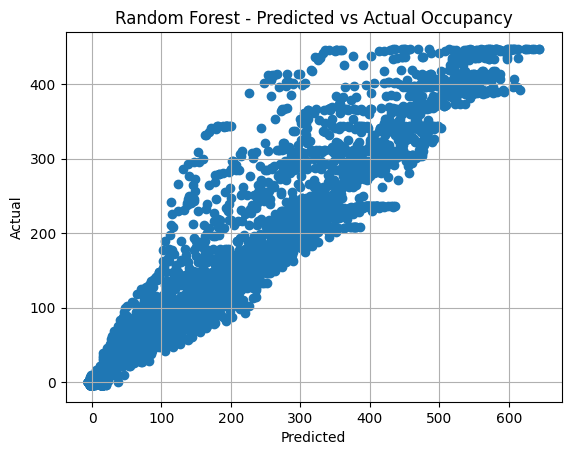

In [9]:
if __name__ == '__main__':
    # Import data
    data = pd.read_excel(data_path[0])
    
    # Split data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(data, (11, 11))
    
    # Train Random Forest Regressor
    RF_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
    RF_model.fit(x_train, y_train)
    predictions = RF_model.predict(x_test)
    
    # Calculate MSE loss
    mse = mean_squared_error(y_test, predictions)
    print('MSE Loss: ', mse)
    
    # Plot predictions against actual values
    plt.scatter(y_test, predictions)
    plt.title('Random Forest - Predicted vs Actual Occupancy')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.grid()
    plt.show()
    
    
    
    